In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn import metrics

In [4]:
c=glob.glob('cloudy/*.*')
d=glob.glob('desert/*.*')
g=glob.glob('green_area/*.*')
w=glob.glob('water/*.*')
            

In [6]:
print('number of images in cloudy :',len(c))
print('number of images in desert :',len(d))
print('number of images in green_area :',len(g))
print('number of images in water :',len(w))

number of images in cloudy : 1500
number of images in desert : 1131
number of images in green_area : 1500
number of images in water : 1500


In [7]:
image=[]
label=[]
for i in c:
    im=plt.imread(i)
    image.append(im)
    label.append(0)
for i in d:
    im=plt.imread(i)
    image.append(im)
    label.append(1)  
for i in g:
    im=plt.imread(i)
    image.append(im)
    label.append(2)
for i in w:
    im=plt.imread(i)
    image.append(im)
    label.append(3)    
    

In [8]:
len(image)

5631

In [9]:
len(label)

5631

In [10]:
image,label=shuffle(image,label,random_state=42)

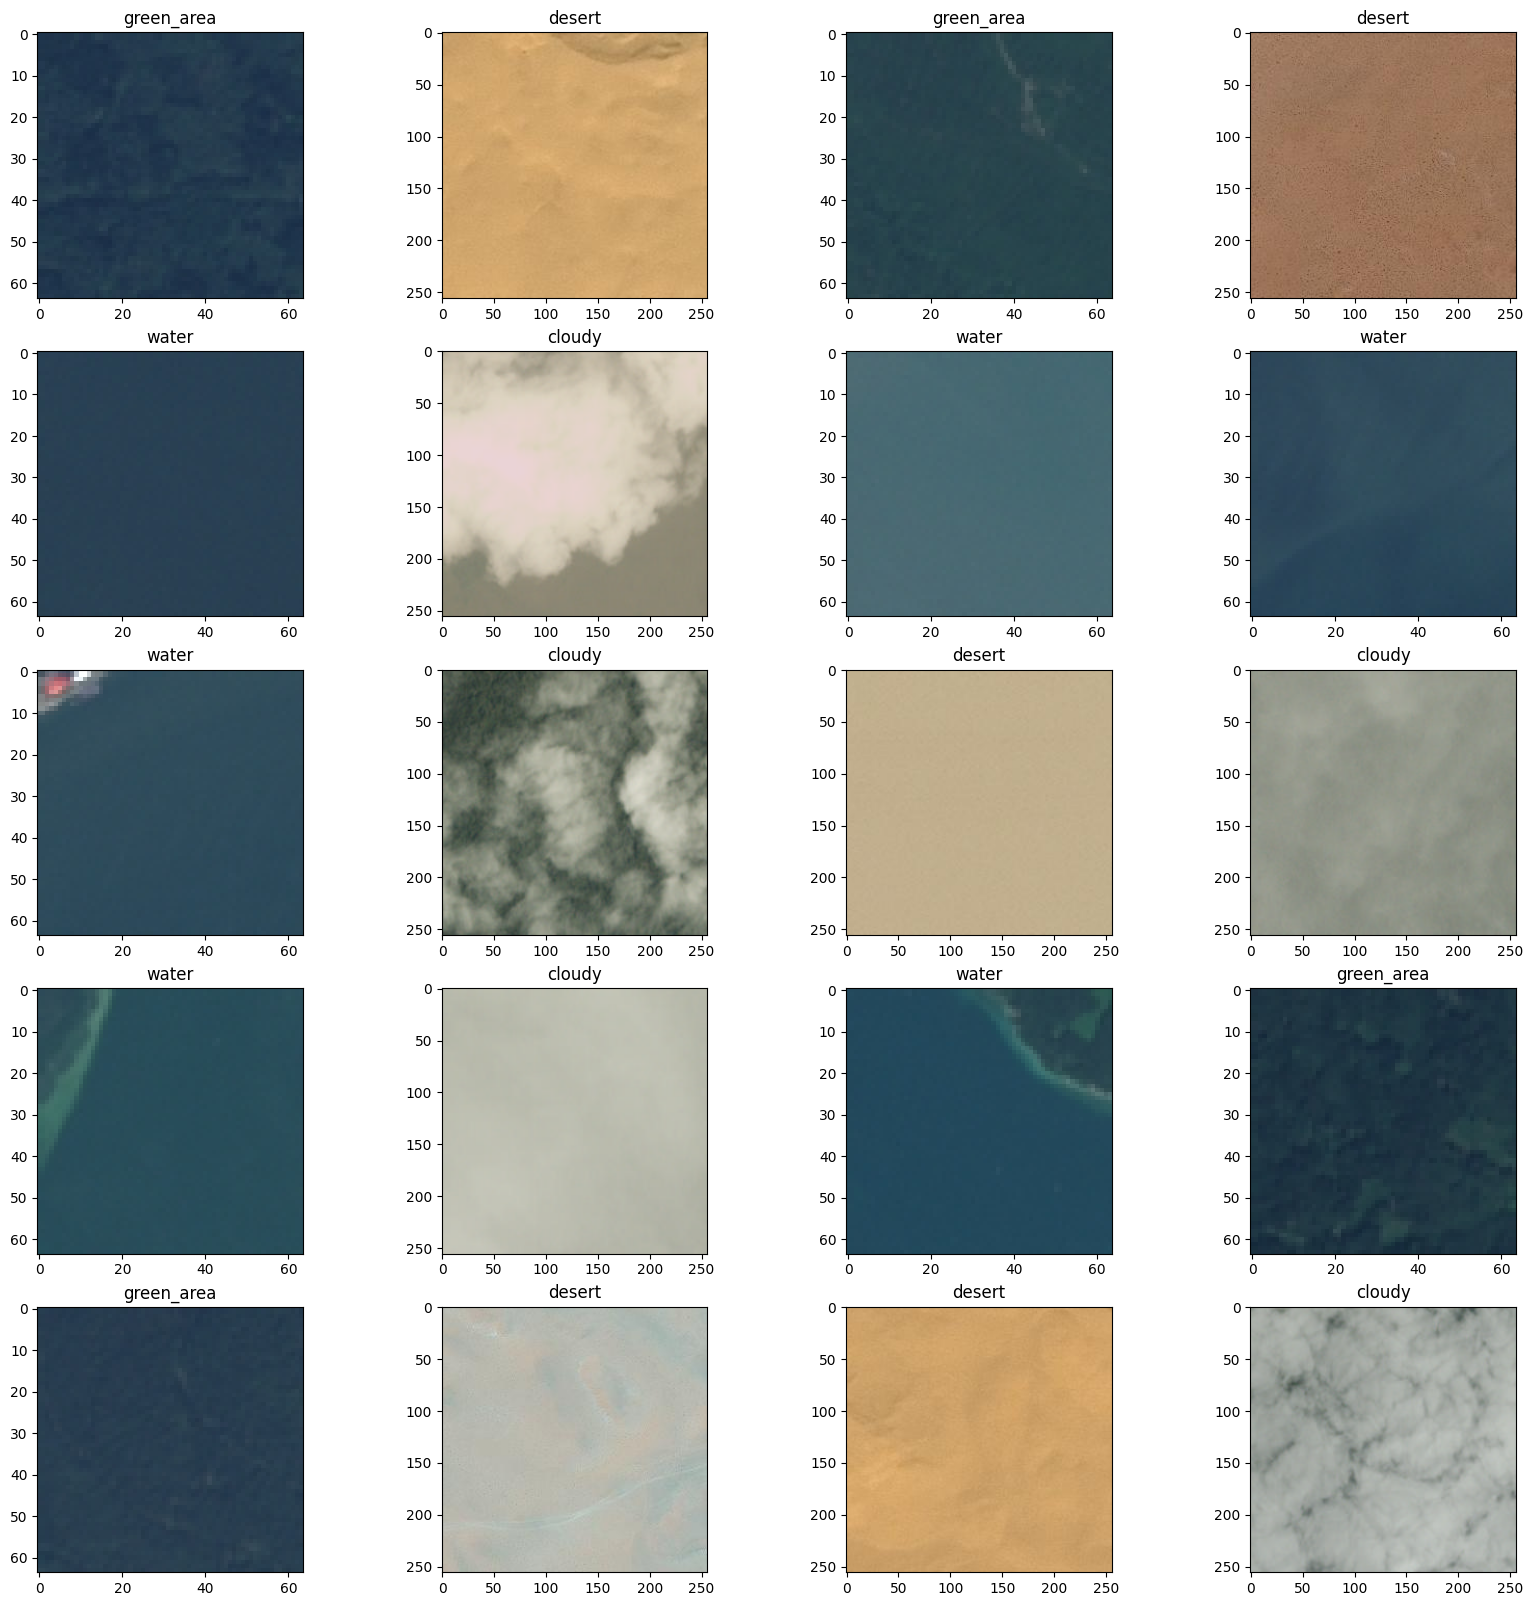

In [11]:
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(image[i])
    if label[i]==0:
        plt.title('cloudy')
    elif label[i]==1:
        plt.title('desert')
    elif label[i]==2:
        plt.title('green_area')
    else:
        plt.title('water')

In [12]:
for i in range(30):
    print(image[i].shape)

(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(256, 256, 3)
(256, 256, 4)
(64, 64, 3)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(256, 256, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [15]:
def change(x):
    if x.shape[-1]==4:
         x=x[:,:,:3]
    return x    

In [16]:
image=[change(i) for i in image]

In [18]:
len(image)

5631

In [19]:
for i in range(20):
    print(image[i].shape)

(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [21]:
X=[]
for i in image:
    X.append(resize(i,(128,128,3)))
             

In [23]:
for i in range(10,20):
    print(X[i].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [24]:
X=np.array(X)

In [25]:
y=np.array(label)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

C:\Users\user\.conda\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X_train,y_train, epochs=30,validation_split=0.1)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 122s 225ms/step - accuracy: 0.6505 - loss: 0.6257 - val_accuracy: 0.7470 - val_loss: 0.4835
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 28s 230ms/step - accuracy: 0.7532 - loss: 0.4949 - val_accuracy: 0.8865 - val_loss: 0.4147
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 248ms/step - accuracy: 0.8226 - loss: 0.4013 - val_accuracy: 0.8487 - val_loss: 0.3564
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 28s 232ms/step - accuracy: 0.8608 - loss: 0.3251 - val_accuracy: 0.7943 - val_loss: 0.4069
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8797 - loss: 0.3127 - val_accuracy: 0.8842 - val_loss: 0.2685
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 247ms/step - accuracy: 0.8789 - loss: 0.2821 - val_accuracy: 0.8983 - val_loss: 0.2480
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 279ms/step - accuracy: 0.8787 - loss: 0.2910 - val_accuracy: 0.8392 - val_loss: 0.3981
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 34s 283ms/step - accuracy: 0.8818 - loss: 

In [32]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8537 - loss: 0.3053


[0.305263489484787, 0.8536931872367859]

In [35]:
pred_y=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [36]:
pred_y

array([[2.2229054e-08, 1.4082358e-14, 5.2645960e-06, 9.9999475e-01],
       [9.3142211e-07, 1.1677542e-09, 9.9219185e-01, 7.8072115e-03],
       [2.1326530e-04, 4.2160354e-07, 1.9433130e-01, 8.0545503e-01],
       ...,
       [9.5377147e-01, 1.3370725e-02, 3.0955265e-09, 3.2857761e-02],
       [9.6637505e-01, 8.5345265e-03, 8.9314132e-11, 2.5090456e-02],
       [2.7088487e-01, 1.0613748e-03, 1.2333474e-04, 7.2793049e-01]],
      shape=(1408, 4), dtype=float32)

In [37]:
pred_y=np.argmax(pred_y,axis=1)

In [38]:
pred_y

array([3, 2, 3, ..., 0, 0, 3], shape=(1408,))

In [39]:
from sklearn import metrics

In [40]:
metrics.accuracy_score(y_test,pred_y)

0.8536931818181818

<Axes: >

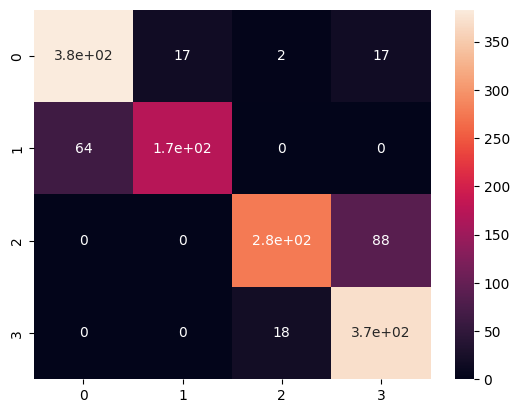

In [42]:
sns.heatmap(metrics.confusion_matrix(y_test,pred_y),annot=True)